In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Efficacy Stuff

In [3]:
EffDiffuseA = [ 97.24, 107.22, 104.97, 102.39, 100.71, 106.42, 141.88, 152.23 ]
EffDiffuseB = [ -0.46, 1.15, 2.96, 5.59, 5.94, 3.83, 1.90, 0.35 ]
EffDiffuseC = [ 12.00, 0.59, -5.53, -13.95, -22.75, -36.15, -53.24, -45.27 ]
EffDiffuseD = [ -8.91, -3.95, -8.77, -13.90, -23.74, -28.83, -14.03, -7.98 ]

EffDirectA = [ 57.20, 98.99, 109.83, 110.34, 106.36, 107.19, 105.75, 101.18 ]
EffDirectB = [ -4.55, -3.46, -4.90, -5.84, -3.97, -1.25, 0.77, 1.58 ]
EffDirectC = [ -2.98, -1.21, -1.71, -1.99, -1.75, -1.51, -1.26, -1.10 ]
EffDirectD = [ 117.12, 12.38, -8.81, -4.56, -6.16, -26.73, -34.44, -8.29 ]

AtmPreciWater = 2

def computeDiffuseEfficacy(brightness: float, bin: int, solar_zenith: float):
    return EffDiffuseA[bin] + EffDiffuseB[bin] * AtmPreciWater + EffDiffuseC[bin] * np.cos(solar_zenith) + EffDiffuseD[bin] * np.log(brightness)

def computeDirectEfficacy(brightness: float, bin: int, solar_zenith: float):
    return EffDirectA[bin] + EffDirectB[bin] * AtmPreciWater + EffDirectC[bin] * np.exp(5.73 * solar_zenith - 5) + EffDirectD[bin] * brightness

In [5]:
Brightness = np.linspace(0.01, 1)
SolarZenith = np.linspace(-np.pi/2, np.pi/2)

B, SZ = np.meshgrid(Brightness, SolarZenith)

96.32 149.34590095156213
109.52 128.30011910221137
105.3628412244102 151.27734253111555
99.6271672840004 177.58186558523445
89.85168858143433 221.91674021535727
77.94857328434513 246.84705646203668
92.46735384947539 210.29053770941292
107.68325899259483 189.67925808418494


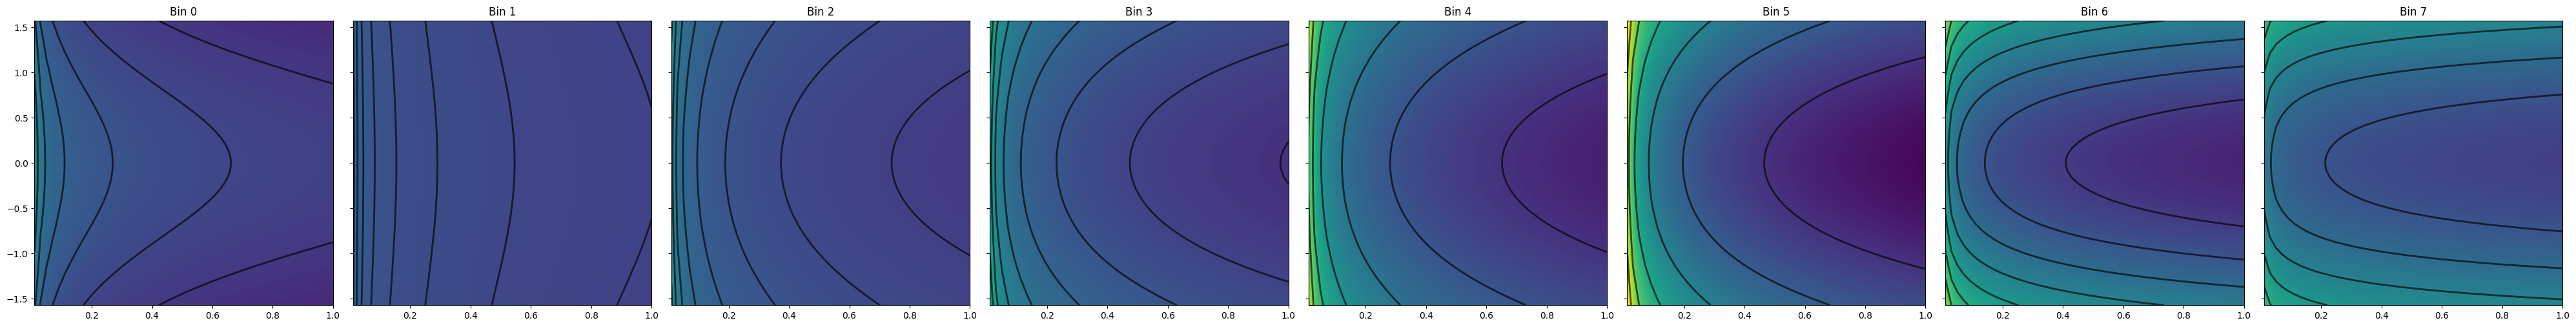

In [ ]:
Min=75
Max=250
fig, ax = plt.subplots(1, 8, sharey=True, figsize=(40, 5))
for i in range(8):
    Diff = computeDiffuseEfficacy(B, i, SZ)
    ax[i].imshow(Diff, extent=[Brightness[0], Brightness[-1], SolarZenith[0], SolarZenith[-1]], interpolation='bilinear', aspect=0.3, vmin=Min, vmax=Max)
    ax[i].contour(Brightness, SolarZenith, Diff, colors='black', alpha=0.65, linewidths=2, vmin=Min, vmax=Max)
    ax[i].set_title(f"Bin {i}")
    # print(np.amin(Diff), np.amax(Diff))

fig.tight_layout()

-113.5391868872708 165.21999752368663
26.086226800806156 104.44999899451705
-2.20475220712518 99.94189857902825
-14.62237245156673 98.6143983463545
-3.350126527759688 98.35839854578914
-4.5378806039526545 104.42269874522376
4.010708900013029 106.94559895296818
35.95220618255105 104.25709908592461


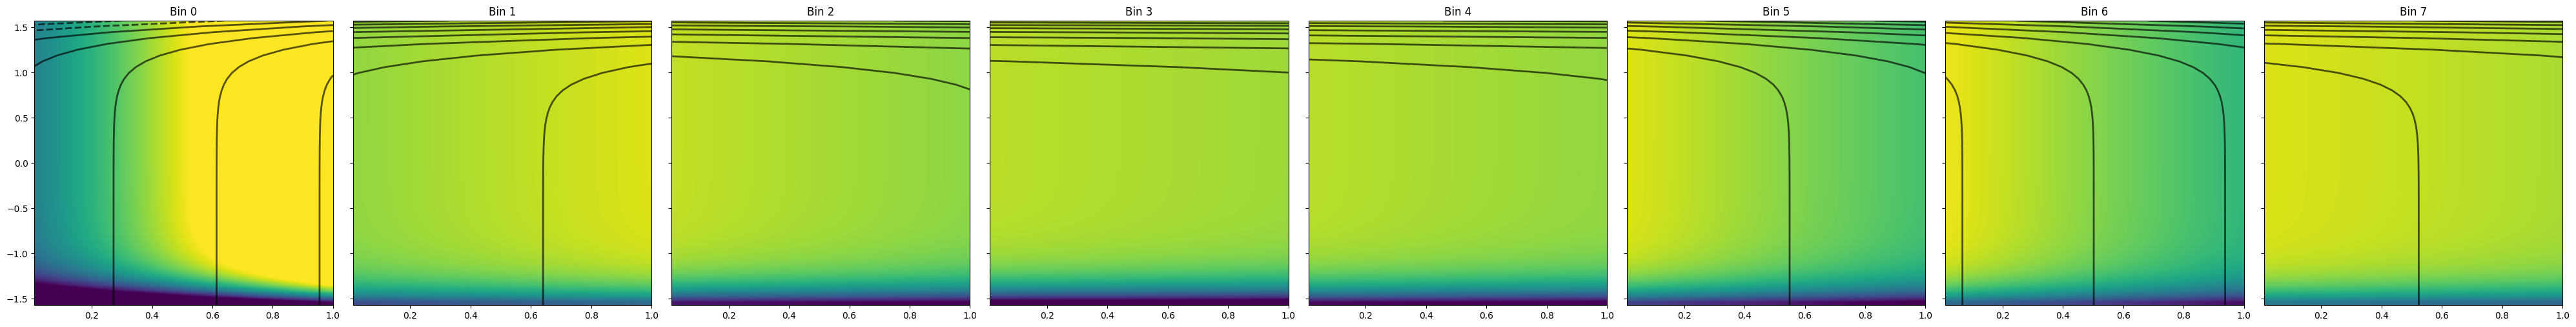

In [58]:
Min=0
Max=110
fig, ax = plt.subplots(1, 8, sharey=True, figsize=(40, 5))
for i in range(8):
    # Dir = np.maximum(computeDirectEfficacy(B, i, SZ), 0)
    Dir = computeDirectEfficacy(B, i, SZ)
    ax[i].imshow(Dir, extent=[Brightness[0], Brightness[-1], SolarZenith[0], SolarZenith[-1]], interpolation='bilinear', aspect=0.3, vmin=Min, vmax=Max)
    ax[i].contour(Brightness, SolarZenith, Dir, colors='black', alpha=0.65, linewidths=2, vmin=Min, vmax=Max)
    ax[i].set_title(f"Bin {i}")
    print(np.amin(Dir), np.amax(Dir))

fig.tight_layout()

In [61]:
def ortho(n: np.ndarray):
    sign = np.copysign(1, n[2])
    a    = -1 / (sign + n[2])
    b    = n[0] * n[1] * a

    t  = [1 + sign * n[0] * n[0] * a, sign * b, -sign * n[0]]
    bt = [b, sign + n[1] * n[1] * a, -n[1]]
    return (t, bt, n)

print("X+", ortho([1,0,0]))
print("X-", ortho([-1,0,0]))
print("Y+", ortho([0,1,0]))
print("Y-", ortho([0,-1,0]))
print("Z+", ortho([0,0,1]))
print("Z-", ortho([0,0,-1]))

X+ ([0.0, -0.0, -1.0], [-0.0, 1.0, 0], [1, 0, 0])
X- ([0.0, -0.0, 1.0], [-0.0, 1.0, 0], [-1, 0, 0])
Y+ ([1.0, -0.0, -0.0], [-0.0, 0.0, -1], [0, 1, 0])
Y- ([1.0, -0.0, -0.0], [-0.0, 0.0, 1], [0, -1, 0])
Z+ ([1.0, -0.0, -0.0], [-0.0, 1.0, 0], [0, 0, 1])
Z- ([1.0, -0.0, 0.0], [0.0, -1.0, 0], [0, 0, -1])


In [78]:
def ortho_y(n: np.ndarray):
    sign = np.copysign(1, n[1])
    a    = -1 / (sign + n[1])
    b    = n[0] * n[2] * a

    t  = [1 + sign * n[0] * n[0] * a, -sign * n[0], sign * b]
    bt = [b, n[2], sign + n[2] * n[2] * a]
    return (t, n, bt)

print("X+", ortho_y([1,0,0]))
print("X-", ortho_y([-1,0,0]))
print("Y+", ortho_y([0,1,0]))
print("Y-", ortho_y([0,-1,0]))
print("Z+", ortho_y([0,0,1]))
print("Z-", ortho_y([0,0,-1]))

X+ ([0.0, -1.0, -0.0], [1, 0, 0], [-0.0, 0, 1.0])
X- ([0.0, 1.0, -0.0], [-1, 0, 0], [-0.0, 0, 1.0])
Y+ ([1.0, -0.0, -0.0], [0, 1, 0], [-0.0, 0, 1.0])
Y- ([1.0, 0.0, -0.0], [0, -1, 0], [0.0, 0, -1.0])
Z+ ([1.0, -0.0, -0.0], [0, 0, 1], [-0.0, 1, 0.0])
Z- ([1.0, -0.0, -0.0], [0, 0, -1], [-0.0, -1, 0.0])
